## Feature Selection

In [2]:
import pandas as pd

In [2]:
test = pd.read_csv('../data/flights_test.csv')
test.head(5)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,1577865600000,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,1577865600000,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,1577865600000,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,1577865600000,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,1577865600000,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333


In [3]:
results = pd.read_csv('../data/sample_submission.csv')
results.head()

,fl_date,mkt_carrier,mkt_carrier_fl_num,origin,dest,predicted_delay
0,2020-01-01,WN,5888,ONT,SFO,6.442385
1,2020-01-01,WN,6276,ONT,SFO,6.174046
2,2020-01-01,WN,4598,ONT,SJC,3.233856
3,2020-01-01,WN,4761,ONT,SJC,5.854195
4,2020-01-01,WN,5162,ONT,SJC,5.258032


In [4]:
fl = pd.read_csv('../../flights_data/crs_fl_data.csv')
fl.head()

,fl_date,crs_dep_time,crs_arr_time
0,2019-05-01,655,1044
1,2019-05-01,1441,175
2,2019-05-01,1730,2044
3,2019-05-01,829,1025
4,2019-05-01,1854,2019


In [4]:
reduced_train_df = pd.read_csv('../../flights_data/reduced_train_df.csv')
reduced_train_df.head()

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1
3,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,327,DL,...,San Jose,CA,1900-01-01 08:29:00,1900-01-01 10:25:00,N,296.0,1.0,2062.0,12.0,1
4,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,517,DL,...,Atlanta,GA,1900-01-01 18:54:00,1900-01-01 20:19:00,N,85.0,1.0,306.0,35.0,1


In [5]:
reduced_train_df['fl_date'] = pd.to_datetime(reduced_train_df['fl_date'], format='%Y-%m-%d')
reduced_train_df['crs_dep_time'] = pd.to_datetime(reduced_train_df['crs_dep_time'],format= '%Y-%m-%d %H:%M:%S')
reduced_train_df['crs_arr_time'] = pd.to_datetime(reduced_train_df['crs_arr_time'],format= '%Y-%m-%d %H:%M:%S')

In [6]:
reduced_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   fl_date             520681 non-null  datetime64[ns]
 1   year                520681 non-null  int64         
 2   month               520681 non-null  int64         
 3   day_of_week         520681 non-null  int64         
 4   day_name            520681 non-null  object        
 5   mkt_unique_carrier  520681 non-null  object        
 6   branded_code_share  520681 non-null  object        
 7   mkt_carrier         520681 non-null  object        
 8   mkt_carrier_fl_num  520681 non-null  int64         
 9   op_unique_carrier   520681 non-null  object        
 10  tail_num            520681 non-null  object        
 11  op_carrier_fl_num   520681 non-null  int64         
 12  origin_airport_id   520681 non-null  int64         
 13  origin              520681 no

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

corr = reduced_train_df.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/siyumao/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/siyumao/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,year,month,day_of_week,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_elapsed_time,flights,distance,arr_delay,target_class
year,1.000000,-0.001614,0.000856,-0.013680,-0.013685,-0.002132,0.000578,0.009424,nan,0.004035,0.018390,0.012597
month,-0.001614,1.000000,0.009526,0.010979,0.010978,-0.001902,-0.000723,-0.006433,nan,0.000821,-0.010558,-0.008988
day_of_week,0.000856,0.009526,1.000000,0.056734,0.056695,0.001173,0.003713,0.008378,nan,0.010132,-0.006804,-0.009309
mkt_carrier_fl_num,-0.013680,0.010979,0.056734,1.000000,0.999900,-0.030138,-0.033493,-0.332921,nan,-0.364070,0.029547,0.004401
op_carrier_fl_num,-0.013685,0.010978,0.056695,0.999900,1.000000,-0.030137,-0.033494,-0.332903,nan,-0.364044,0.029534,0.004389
origin_airport_id,-0.002132,-0.001902,0.001173,-0.030138,-0.030137,1.000000,0.018184,0.050454,nan,0.071747,-0.006295,-0.002201
dest_airport_id,0.000578,-0.000723,0.003713,-0.033493,-0.033494,0.018184,1.000000,0.083077,nan,0.071987,0.000304,0.017462
crs_elapsed_time,0.009424,-0.006433,0.008378,-0.332921,-0.332903,0.050454,0.083077,1.000000,nan,0.982584,-0.004969,0.016699
flights,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
distance,0.004035,0.000821,0.010132,-0.364070,-0.364044,0.071747,0.071987,0.982584,nan,1.000000,-0.008601,0.019076


#### results 
1. mkt_carrier_fl_num highly correlated with op_carrier_fl_num
2. distance highly corrlated with crs_elapsed_time 


In [8]:
reduced_train_df.arr_delay.describe()

count    520681.000000
mean         12.897613
std          57.194402
min         -97.000000
25%         -12.000000
50%           0.000000
75%          17.000000
max        2050.000000
Name: arr_delay, dtype: float64

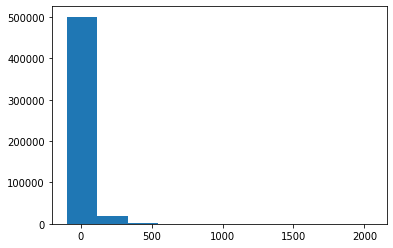

In [9]:
# not normal distribution, and def there are some outliers
# histogram plot
plt.hist(reduced_train_df.arr_delay)
plt.show()

In [10]:
reduced_train_df.columns

Index(['fl_date', 'year', 'month', 'day_of_week', 'day_name',
       'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'origin_city', 'origin_state', 'dest_airport_id', 'dest',
       'dest_city_name', 'dest_city', 'dest_state', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'arr_delay', 'target_class'],
      dtype='object')

In [11]:
reduced_train_df.groupby('month').arr_delay.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,40348.0,11.248141,59.572350,-97.0,-14.0,-2.0,15.0,1556.0
2,38014.0,15.488004,61.970243,-65.0,-12.0,1.0,20.0,2050.0
3,43957.0,9.874400,51.431441,-61.0,-13.0,-1.0,14.0,1568.0
4,42420.0,11.236799,52.728549,-58.0,-13.0,-1.0,15.0,1277.0
5,44849.0,13.839015,55.429893,-64.0,-12.0,0.0,17.0,1624.0
6,46291.0,18.799723,62.335982,-57.0,-10.0,2.0,23.0,1844.0
7,46495.0,16.974105,63.611706,-74.0,-12.0,1.0,21.0,1780.0
8,46799.0,16.944379,63.762215,-65.0,-12.0,1.0,21.0,1647.0
9,40949.0,7.950109,49.795849,-65.0,-14.0,-4.0,11.0,1976.0


In [12]:
state_ct = reduced_train_df.dest_state.value_counts()
state_perc = state_ct / sum(state_ct)

In [13]:
sum(state_perc.head(7))

0.4944025228498831

In [14]:
state_perc.head(7)

CA    0.109877
TX    0.099026
FL    0.073477
IL    0.062954
GA    0.051832
NY    0.051369
NC    0.045867
Name: dest_state, dtype: float64

In [15]:
reduced_train_df['dest'].value_counts().head(10)

ORD    25730
ATL    25068
DFW    19035
DEN    18337
LAX    16406
CLT    16222
SEA    12820
SFO    12049
IAH    11708
PHX    11596
Name: dest, dtype: int64

#### Data cleanning 

In [16]:
reduced_train_df.columns

Index(['fl_date', 'year', 'month', 'day_of_week', 'day_name',
       'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'origin_city', 'origin_state', 'dest_airport_id', 'dest',
       'dest_city_name', 'dest_city', 'dest_state', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'arr_delay', 'target_class'],
      dtype='object')

In [17]:
reduced_train_df.head()

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1
3,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,327,DL,...,San Jose,CA,1900-01-01 08:29:00,1900-01-01 10:25:00,N,296.0,1.0,2062.0,12.0,1
4,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,517,DL,...,Atlanta,GA,1900-01-01 18:54:00,1900-01-01 20:19:00,N,85.0,1.0,306.0,35.0,1


In [18]:
datetime_format = '%Y-%m-%d %H:%M:%S'
reduced_train_df['crs_dep_time'] = pd.to_datetime(reduced_train_df['crs_dep_time'], format=datetime_format)
h = reduced_train_df['crs_dep_time'].dt.hour
m = reduced_train_df['crs_dep_time'].dt.minute
s = reduced_train_df['crs_dep_time'].dt.second

In [19]:
reduced_train_df['crs_arr_time'] = pd.to_datetime(reduced_train_df['crs_arr_time'], format=datetime_format)
h_arr = reduced_train_df['crs_arr_time'].dt.hour
m = reduced_train_df['crs_arr_time'].dt.minute
s = reduced_train_df['crs_arr_time'].dt.second

In [20]:
reduced_train_df['crs_dep_time_hour'] = h
reduced_train_df['crs_arr_time_hour'] = h_arr

In [21]:
reduced_train_df.head()

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class,crs_dep_time_hour,crs_arr_time_hour
0,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4593,YX,...,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1,6,10
1,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4648,YX,...,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1,14,17
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1,17,20
3,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,327,DL,...,1900-01-01 08:29:00,1900-01-01 10:25:00,N,296.0,1.0,2062.0,12.0,1,8,10
4,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,517,DL,...,1900-01-01 18:54:00,1900-01-01 20:19:00,N,85.0,1.0,306.0,35.0,1,18,20


In [22]:
reduced_train_df.groupby('target_class').mean()

,year,month,day_of_week,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_elapsed_time,flights,distance,arr_delay,crs_dep_time_hour,crs_arr_time_hour
target_class,,,,,,,,,,,,,
0,2018.587492,6.605857,2.952963,2713.717199,2713.674773,12683.812496,12660.022706,137.274204,1.0,762.252523,-13.217549,12.559887,14.120317
1,2018.599871,6.544791,2.915810,2730.079878,2729.993447,12677.110862,12713.259415,139.671165,1.0,784.672479,40.425132,13.822349,15.293657


#### Feature Selection (RFE)

In [23]:
reduced_train_df.columns

Index(['fl_date', 'year', 'month', 'day_of_week', 'day_name',
       'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'origin_city', 'origin_state', 'dest_airport_id', 'dest',
       'dest_city_name', 'dest_city', 'dest_state', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'arr_delay', 'target_class', 'crs_dep_time_hour', 'crs_arr_time_hour'],
      dtype='object')

In [24]:
df = reduced_train_df.drop(columns=['arr_delay','target_class',
'fl_date','day_name','crs_dep_time','crs_arr_time',
'mkt_carrier', 'op_carrier_fl_num','tail_num',
'dest_city_name','origin_city_name', 'origin', 'dest',
'origin_city',  'op_carrier_fl_num', 'origin_city_name',
'origin_city', 'origin_state', 'dest_city_name', 'dest_city', 'dest_state', 'crs_dep_time_hour', 'crs_arr_time_hour'
])
df.head()

,year,month,day_of_week,mkt_unique_carrier,branded_code_share,mkt_carrier_fl_num,op_unique_carrier,origin_airport_id,dest_airport_id,dup,crs_elapsed_time,flights,distance
0,2019,5,2,AA,AA_CODESHARE,4593,YX,13851,11278,N,169.0,1.0,1158.0
1,2019,5,2,AA,AA_CODESHARE,4648,YX,11624,11057,N,144.0,1.0,736.0
2,2019,5,2,DL,DL,32,DL,11298,10397,N,134.0,1.0,731.0
3,2019,5,2,DL,DL,327,DL,11433,14831,N,296.0,1.0,2062.0
4,2019,5,2,DL,DL,517,DL,11995,10397,N,85.0,1.0,306.0


In [25]:
cat_vars = ['year', 'month', 'dup', 'day_of_week', 'mkt_unique_carrier','origin_airport_id',
       'dest_airport_id', 'branded_code_share', 'op_unique_carrier']

In [26]:
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1


df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [27]:
data_final=df[to_keep]
data_final.columns.values

array(['mkt_carrier_fl_num', 'crs_elapsed_time', 'flights', 'distance',
       'year_2018', 'year_2019', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'dup_N', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'mkt_unique_carrier_AA',
       'mkt_unique_carrier_AS', 'mkt_unique_carrier_B6',
       'mkt_unique_carrier_DL', 'mkt_unique_carrier_F9',
       'mkt_unique_carrier_G4', 'mkt_unique_carrier_HA',
       'mkt_unique_carrier_NK', 'mkt_unique_carrier_UA',
       'mkt_unique_carrier_VX', 'mkt_unique_carrier_WN',
       'origin_airport_id_10135', 'origin_airport_id_10136',
       'origin_airport_id_10140', 'origin_airport_id_10141',
       'origin_airport_id_10146', 'origin_airport_id_10154',
       'origin_airport_id_10155', 'origin_airport_id_10157',
       'origin_airport_id_10158', 'origin_airport_

In [28]:
data_final

,mkt_carrier_fl_num,crs_elapsed_time,flights,distance,year_2018,year_2019,month_1,month_2,month_3,month_4,...,op_unique_carrier_OH,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW
0,4593,169.0,1.0,1158.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4648,144.0,1.0,736.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,32,134.0,1.0,731.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,327,296.0,1.0,2062.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,517,85.0,1.0,306.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520676,412,100.0,1.0,550.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520677,4117,101.0,1.0,382.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520678,4129,45.0,1.0,74.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520679,4210,85.0,1.0,427.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
len(reduced_train_df.origin_airport_id.unique())

375

In [30]:
X = data_final
y = reduced_train_df['target_class']

In [31]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE

In [32]:
# rfe = RFE(estimator=LogisticRegression(), n_features_to_select=30)
# # fit RFE
# rfe.fit(X, y)
# # summarize all features
# for i in range(X.shape[1]):
# 	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [33]:
# import numpy as np 
# selected = np.array([9,12,21,26,27,30,34,35,36,37,39,40,41,42,43,44,45,58,59,62,63,64,65,75,76,77,78,79,80,81])

In [34]:
# columns = []
# for i in selected:
#     columns.append(X.columns[i])

In [35]:
# X_selected = X[columns]
# X_selected

#### Try PCA

In [36]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [37]:
# from sklearn.decomposition import PCA
# x_pca = PCA(n_components=20).fit_transform(X)

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.53


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[42981 37153]
 [36787 39284]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54     80134
           1       0.51      0.52      0.52     76071

    accuracy                           0.53    156205
   macro avg       0.53      0.53      0.53    156205
weighted avg       0.53      0.53      0.53    156205



### Random Forests

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=4, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.54


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55     80134
           1       0.53      0.52      0.52     76071

    accuracy                           0.54    156205
   macro avg       0.54      0.54      0.54    156205
weighted avg       0.54      0.54      0.54    156205



### XGBoost

In [44]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score

# xgb = XGBClassifier()
# # xgb.fit(X_train, y_train)
# # y_pred = xgb.predict(X_test)

# kfold = StratifiedKFold(n_splits=10)
# results = cross_val_score(xgb, X, y, cv=kfold)
# print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# # evaluate predictions
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

/Users/siyumao/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:50:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/siyumao/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:50:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/siyumao/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:51:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/siyumao/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:52:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/siyumao/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:52:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/siyumao/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:53:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/siyumao/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:53:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/siyumao/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:54:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/siyumao/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:55:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/siyumao/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:55:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 55.10% (0.21%)


### Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.5160974360615858


### Desicion Tree

In [46]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# DTclf = DecisionTreeClassifier()
# DT = DTclf.fit(X_train,y_train)
# y_pred = DTclf.predict(X_test)

# # # evaluate predictions
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print(classification_report(y_test, y_pred))

Accuracy: 52.39%
              precision    recall  f1-score   support

           0       0.54      0.54      0.54     80134
           1       0.51      0.51      0.51     76071

    accuracy                           0.52    156205
   macro avg       0.52      0.52      0.52    156205
weighted avg       0.52      0.52      0.52    156205



### Model Comparison 

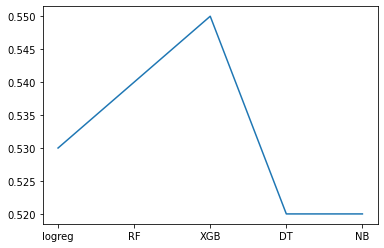

In [51]:
# libraries
import matplotlib.pyplot as plt

models = ['logreg', 'RF', 'XGB', 'DT', 'NB']
results = [0.53, 0.54, 0.55, 0.52, 0.52]


# plot model performance for comparison
plt.plot(models, results)
plt.show()

In [52]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)
	model = DecisionTreeClassifier()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# DT
	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)
	model = DecisionTreeClassifier()
	models['DT'] = Pipeline(steps=[('s',rfe),('m',model)])
    # NB
	rfe = RFE(estimator=GaussianNB(), n_features_to_select=20)
	model = DecisionTreeClassifier()
	models['NB'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)
	model = DecisionTreeClassifier()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# xgb
	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=20)
	model = DecisionTreeClassifier()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, x_pca, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, x_pca, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x_pca, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.527 (0.002)
>DT 0.526 (0.002)
>NB 0.526 (0.002)


KeyboardInterrupt: 

In [1]:
import gc
collected = gc.collect()
print("Garbage collector: collected", 
          "%d objects." % collected) 

Garbage collector: collected 149 objects.
